# **Proyek Pertama : Predictive Analytics**


Panduan Project : [Dicoding](https://www.dicoding.com/academies/319/tutorials/17052)

Prediksi kelas Pumkin Seeds :
- Proyek ini menghasilkan model yang dapat memprediksi suatu biji labu termasuk pada kelas `Çerçevelik` atau `Ürgüp Sivrisi`.
- Model ini bekerja melalui banyak prediktor yang berpengaruh seperti Area, Roundess, Aspect Ratio dan masih banyak lagi.

- Dataset yang digunakan dalam model ini berasal dari ==> [Pumpkin Seeds Dataset](https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset/)

- Proyek ini dikerjakan dalam rangka menyelesaikan kelas [Machine Learning Terapan](https://www.dicoding.com/academies/319)

Nama : Moch. Avin

Asal : Surabaya, Jawa Timur



# Libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix

# Load data

In [2]:
df=pd.read_excel("/content/Pumpkin_Seeds_Dataset.xlsx",sheet_name='Pumpkin_Seeds_Dataset')
df.head()

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness       Class  
0       0.8207  Çerçevelik  
1       0.7487  Çerçevelik  
2       0.6929  Çerçevelik  
3       0.7624  Çerçevelik  
4       0.7557  Çerçevelik

# Eksplorasi data

## Deskripsi Variabel

- `Area`: Luas area
- `Perimeter`: Keliling
- `Major_Axis_Length`: Panjang sumbu utama
- `Minor_Axis_Length`: Panjang sumbu minor
- `Convex_Area`: Luas konveks
- `Equiv_Diameter`: Diameter
- `Eccentricity`: Eksentrisitas
- `Solidity`: Soliditas
- `Extent`: Ekstensi
- `Roundness`: Kebulatan
- `Aspect_Ration`: Rasio aspek
- `Compactness`: Kepadatan
- `Class`:   Kelas `Çerçevelik` dipresentasikan sebagai 0, atau Kelas `Ürgüp Sivrisi` dipresentasikan sebagai 1

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count    2500.000000  2500.000000        2500.000000        2500.000000   
mean    80658.220800  1130.279015         456.601840         225.794921   
std     13664.510228   109.256418          56.235704          23.297245   
min     47939.000000   868.485000         320.844600         152.171800   
25%     70765.000000  1048.829750         414.957850         211.245925   
50%     79076.000000  1123.672000         449.496600         224.703100   
75%     89757.500000  1203.340500         492.737650         240.672875   
max    136574.000000  1559.450000         661.911300         305.818000   

         Convex_Area  Equiv_Diameter  Eccentricity     Solidity       Extent  \
count    2500.000000     2500.000000   2500.000000  2500.000000  2500.000000   
mean    81508.084400      319.334230      0.860879     0.989492     0.693205   
std     13764.092788       26.891920      0.045167     0.003494     0.060914   
min     48366.000000      247.058400      0.492100     0.918600     0.468000   
25%     71512.000000      300.167975      0.831700     0.988300     0.658900   
50%     79872.000000      317.305350      0.863700     0.990300     0.713050   
75%     90797.750000      338.057375      0.897025     0.991500     0.740225   
max    138384.000000      417.002900      0.948100     0.994400     0.829600   

         Roundness  Aspect_Ration  Compactness  
count  2500.000000    2500.000000  2500.000000  
mean      0.791533       2.041702     0.704121  
std       0.055924       0.315997     0.053067  
min       0.554600       1.148700     0.560800  
25%       0.751900       1.801050     0.663475  
50%       0.797750       1.984200     0.707700  
75%       0.834325       2.262075     0.743500  
max       0.939600       3.144400     0.904900

## Mengecek Missing Value

In [5]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

> Tidak terdapat nilai yang kosong (*missing value*) sehingga kita dapat ke tahap selanjutnya.

## Mengecek keseimbangan Class

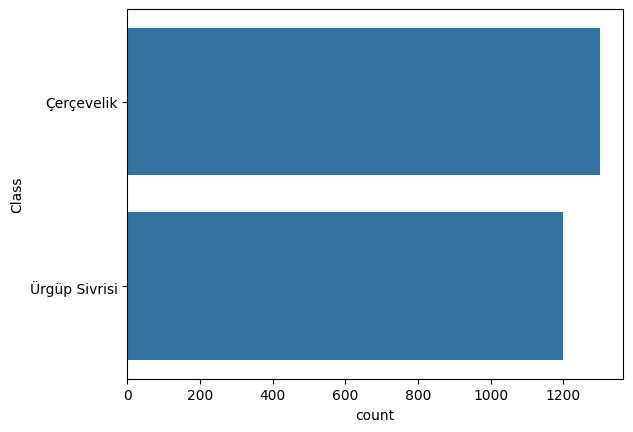

In [7]:
sns.countplot(df["Class"])
plt.show()

## Encoding Class

Mengubah Çerçevelik menjadi 0 dan Ürgüp Sivrisi menjadi 1


In [8]:
from sklearn.preprocessing import OrdinalEncoder
ordinalEncoder=OrdinalEncoder()
df["Class"]=ordinalEncoder.fit_transform(df[["Class"]])

In [9]:
df.head()

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness  Class  
0       0.8207    0.0  
1       0.7487    0.0  
2       0.6929    0.0  
3       0.7624    0.0  
4       0.7557    0.0

## Mengecek dan Menangani Outliers

Mengecek outlier dengan boxplot

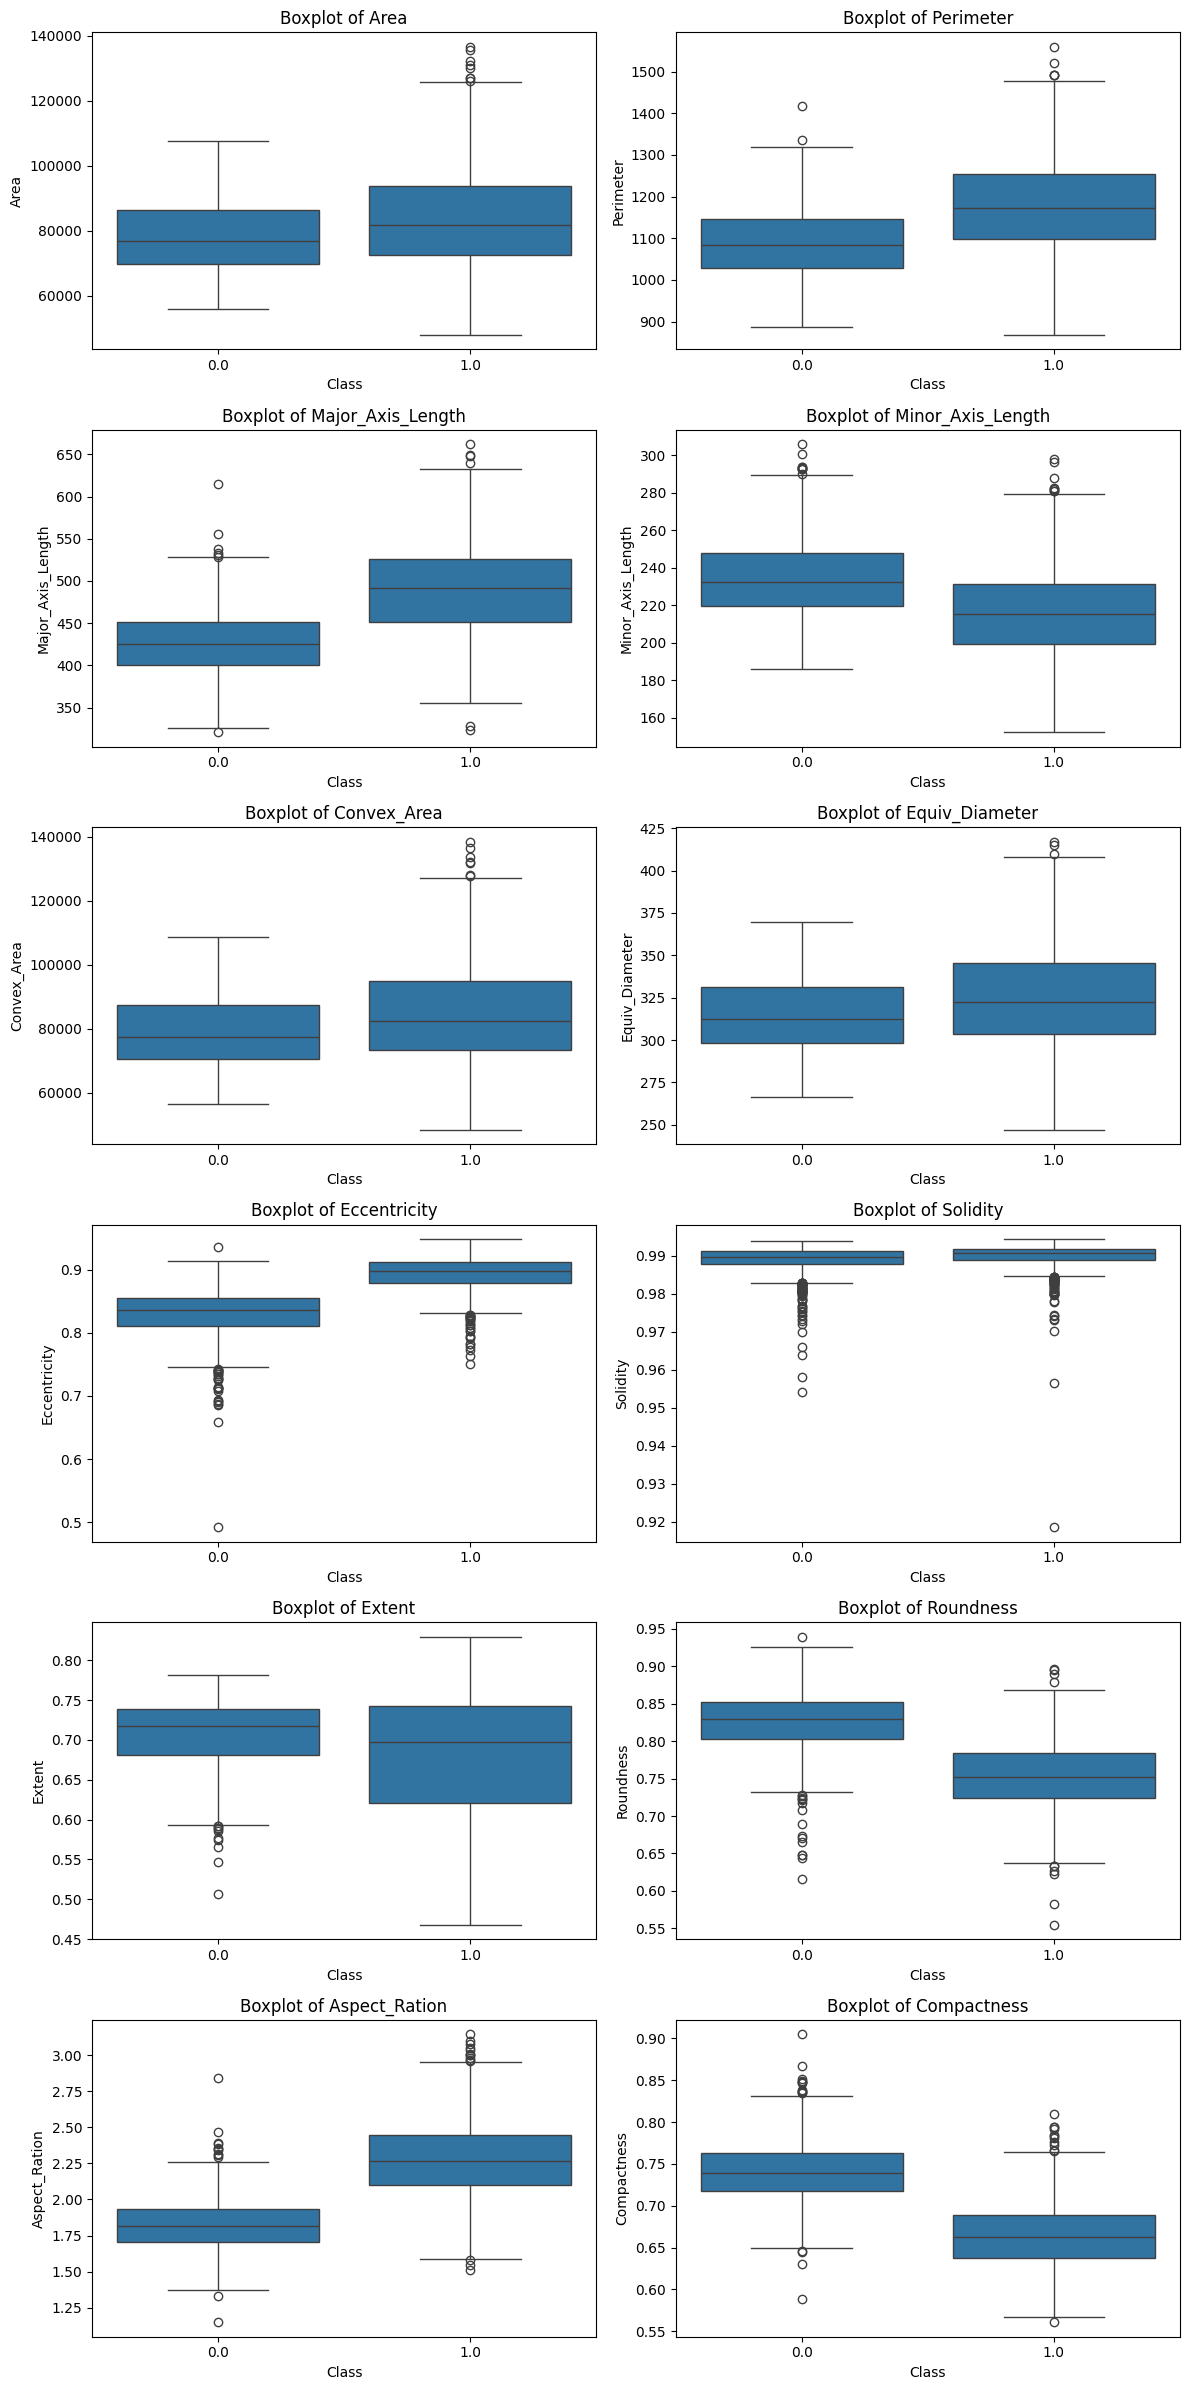

In [10]:
y_columns = df.columns[df.columns != 'Class']

# Membuat satu kanvas dan beberapa sumbu
fig, axes = plt.subplots(nrows=len(y_columns)//2, ncols=2, figsize=(12, len(y_columns)*2))

# Menampilkan boxplot untuk setiap kolom y
for i, y_column in enumerate(y_columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x='Class', y=y_column, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {y_column}')
    axes[row, col].set_xlabel('Class')
    axes[row, col].set_ylabel(y_column)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()


In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

df_clean = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
df_clean.shape

(2285, 13)

> Setelah membuang nilai outlier data kita berubah dari 2500 baris dan 13 kolom menjadi 2285 baris dan 13 kolom.

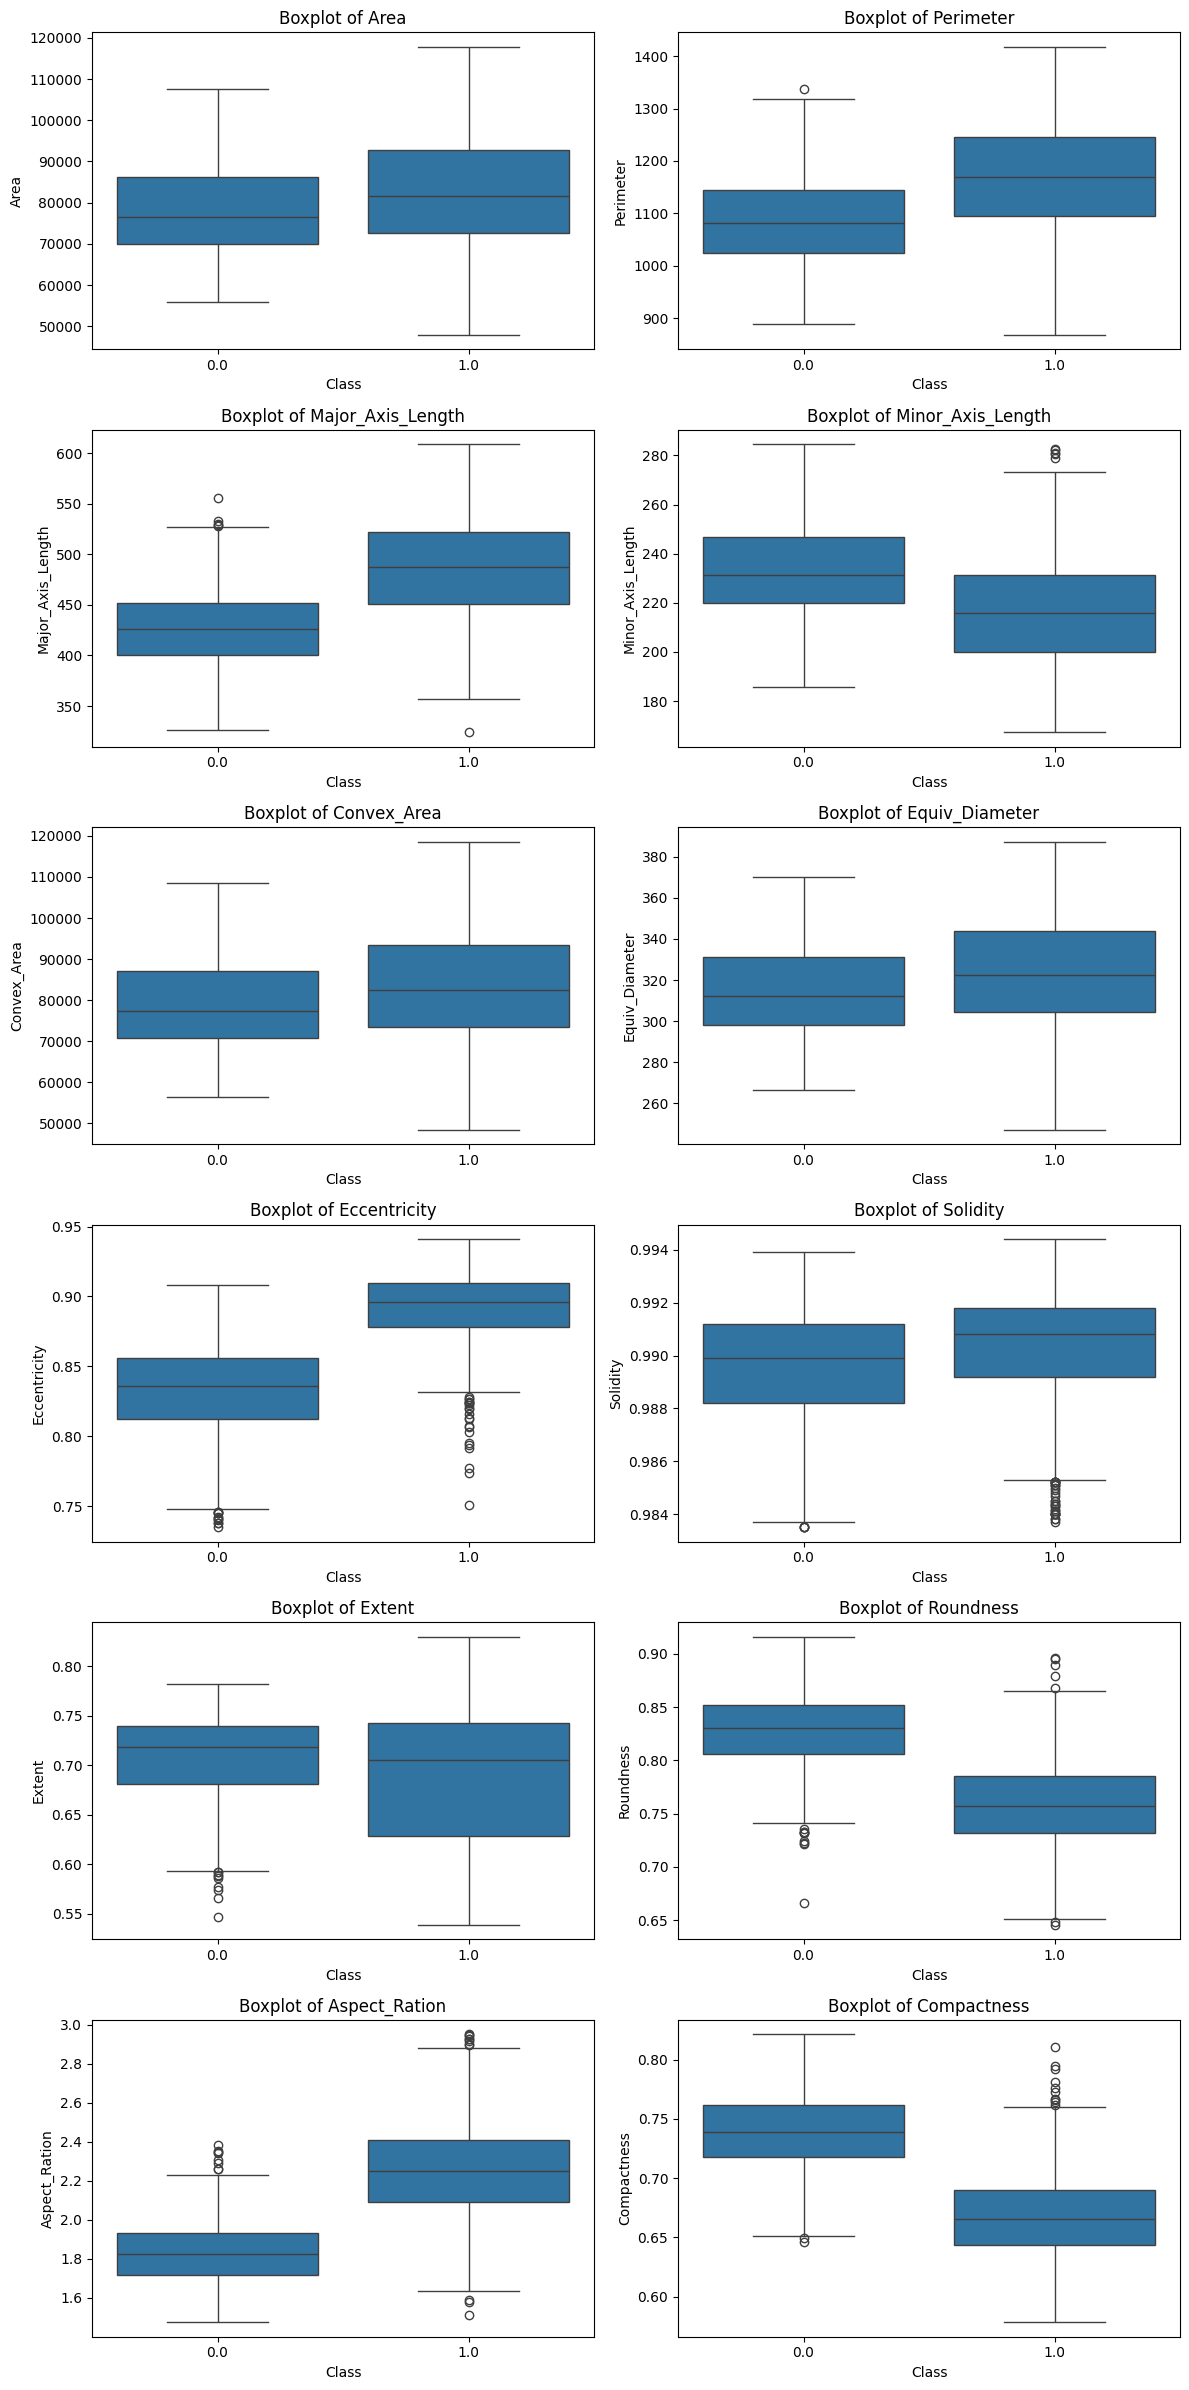

In [ ]:
y_columns = df_clean.columns[df_clean.columns != 'Class']

# Membuat satu kanvas dan beberapa sumbu
fig, axes = plt.subplots(nrows=len(y_columns)//2, ncols=2, figsize=(12, len(y_columns)*2))

# Menampilkan boxplot untuk setiap kolom y
for i, y_column in enumerate(y_columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x='Class', y=y_column, data=df_clean, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {y_column}')
    axes[row, col].set_xlabel('Class')
    axes[row, col].set_ylabel(y_column)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

## Mengecek korelasi antar variabel

Mengecek menggunakan headmap dan plot antar variabel

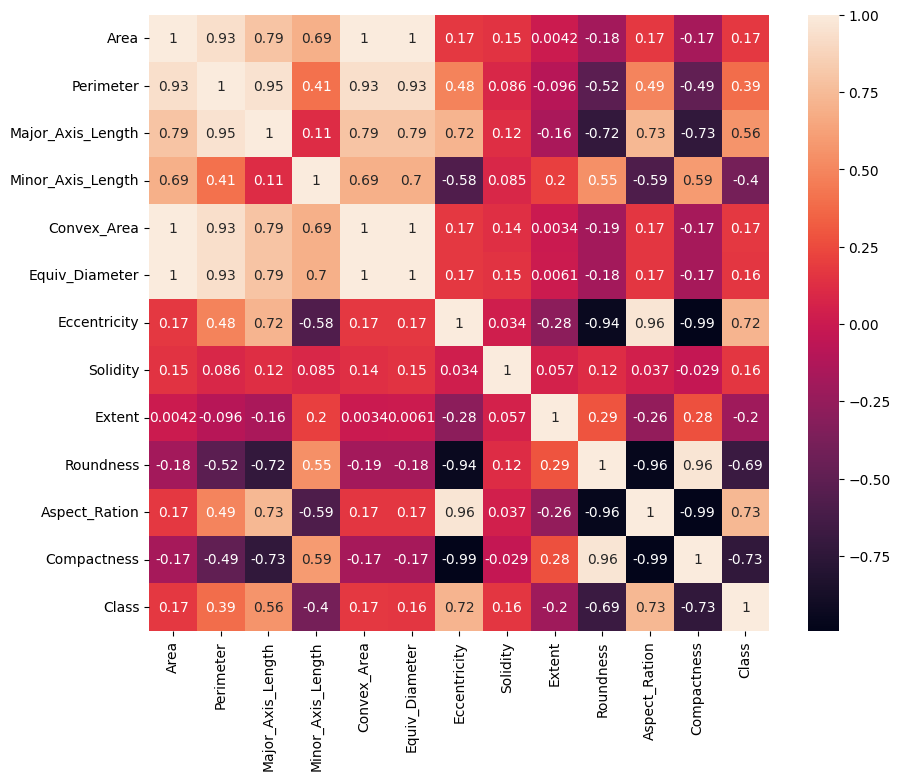

In [12]:
# Correlation
corr = df_clean.corr()

# Figure
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.show()

<Figure size 1500x2000 with 0 Axes>

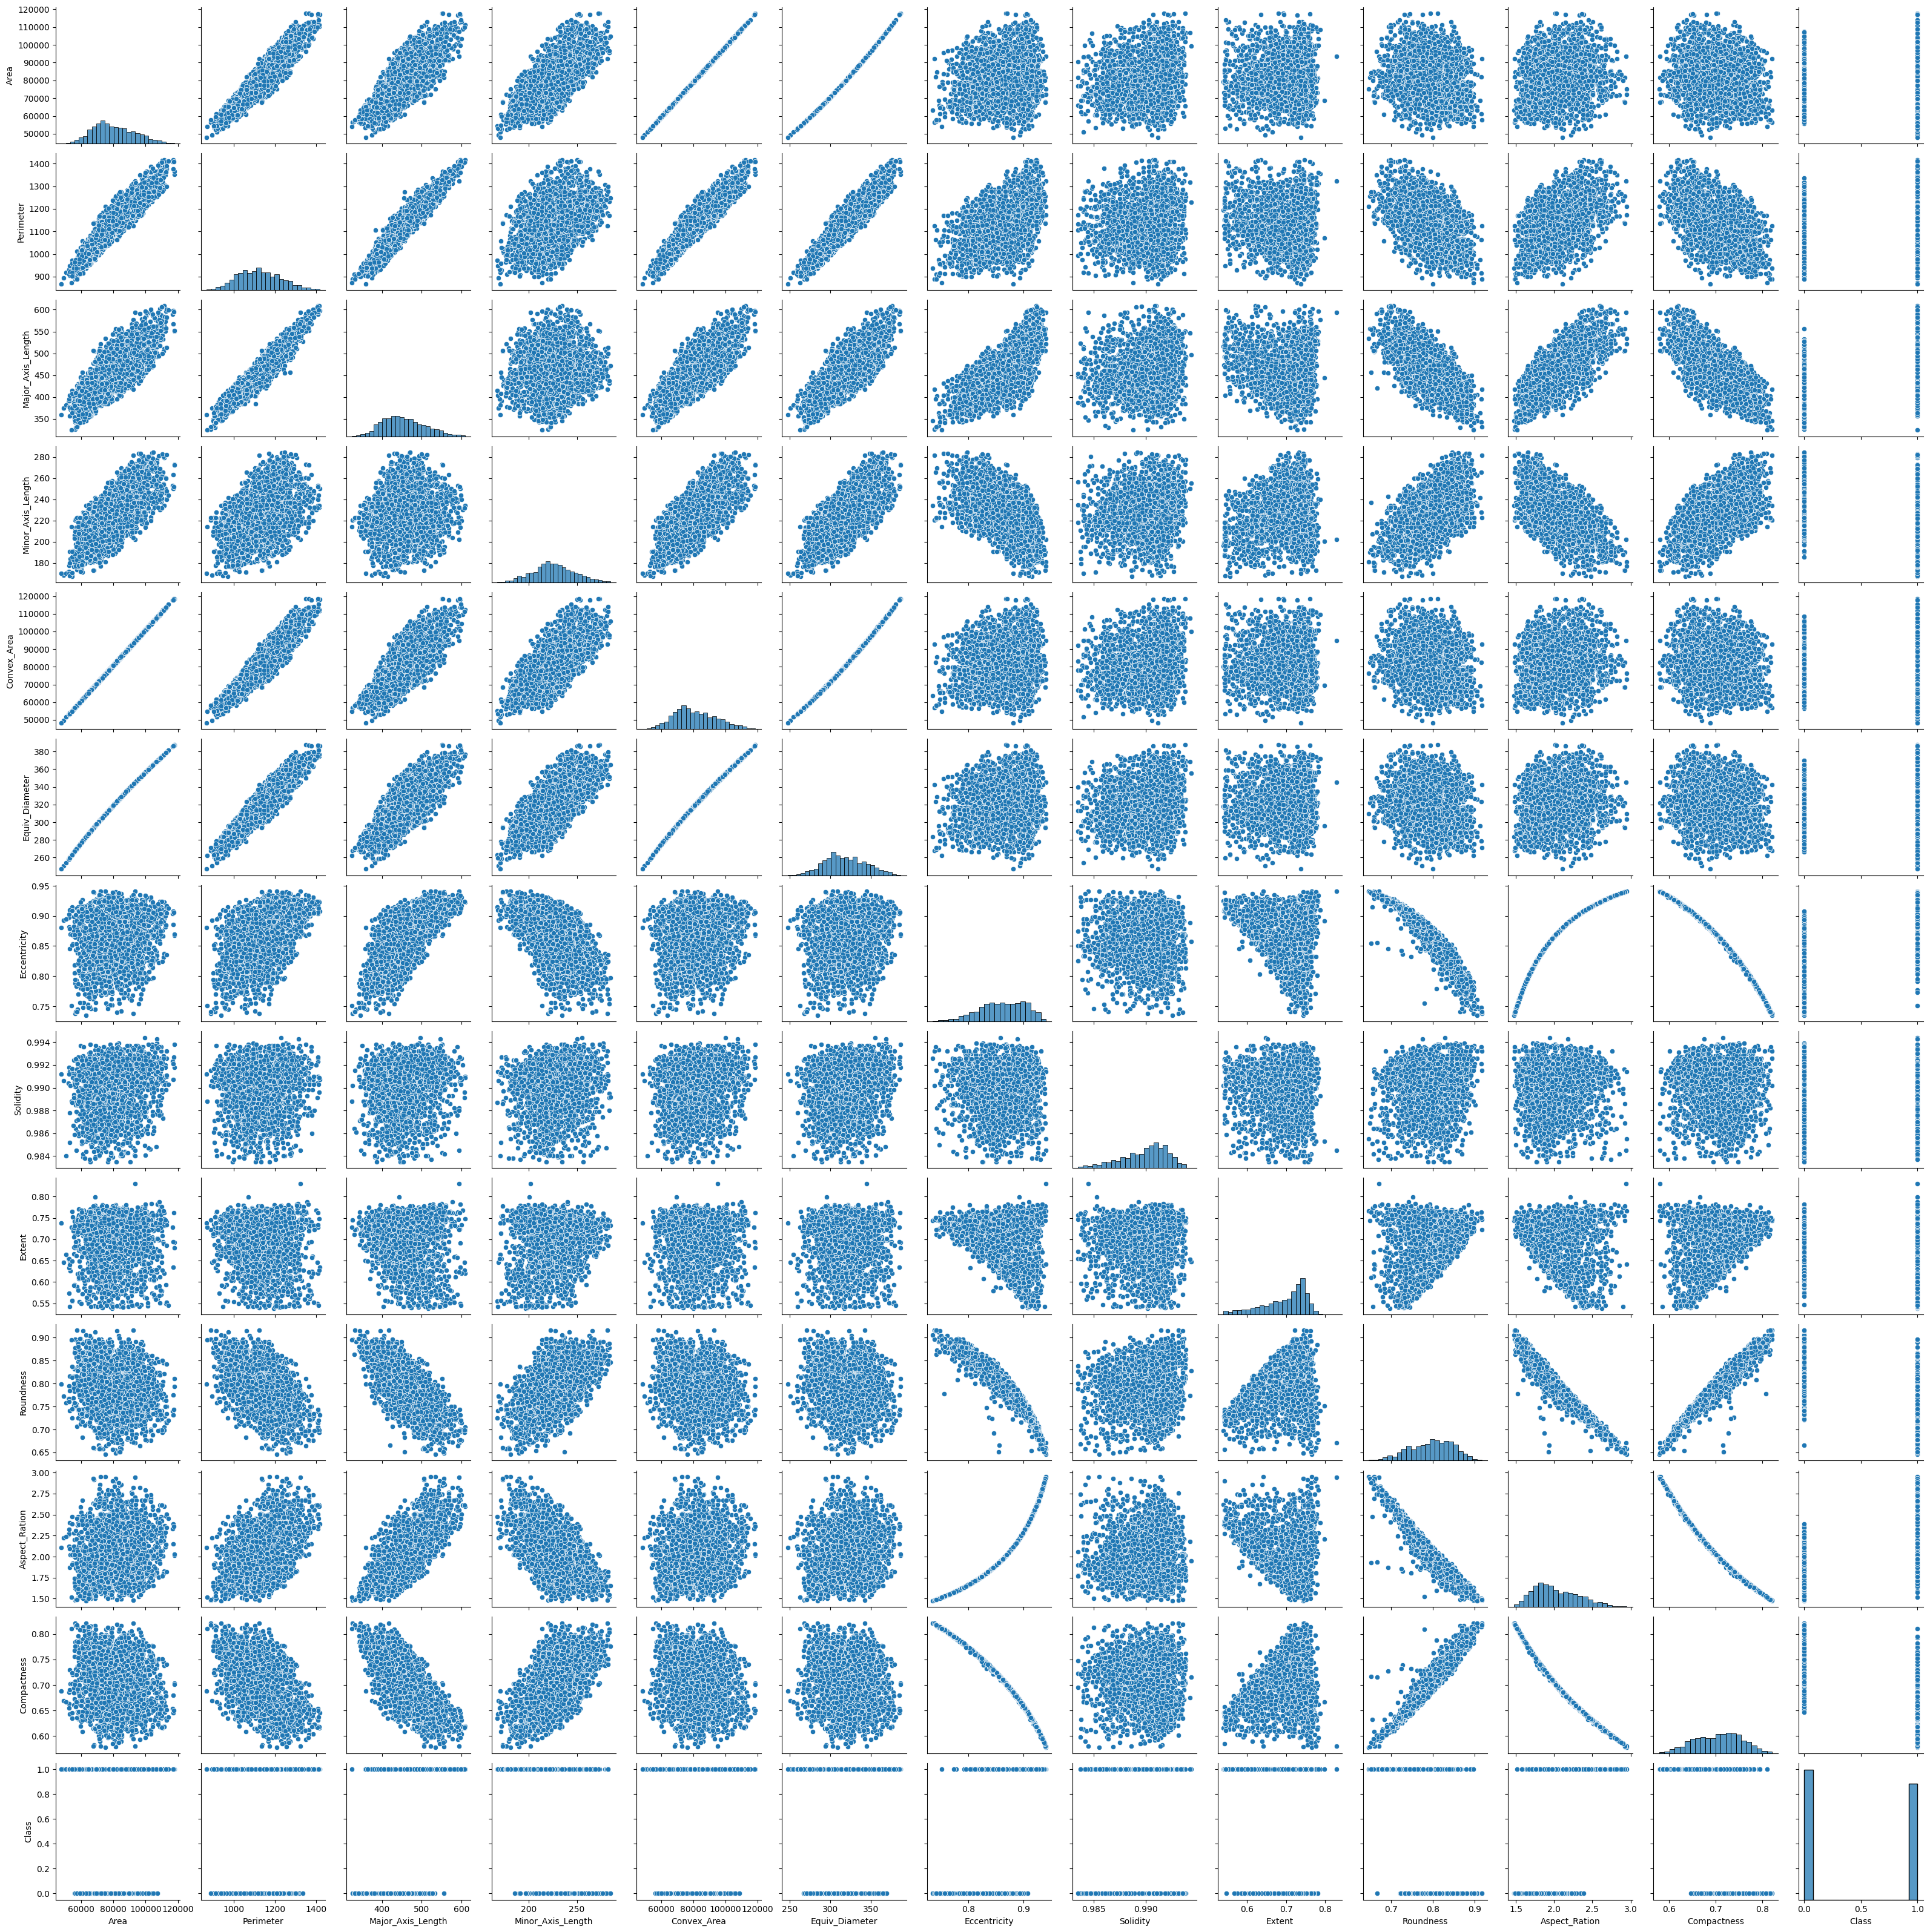

In [ ]:
plt.figure(figsize=(15,20))
sns.pairplot(data=df_clean)
plt.show()

Melalui Correlation Matrix dan Pairplot di atas dapat disimpulkan :

* `Area`, `Convex_Area`, `Equiv_Diameter`, `Solidity` berkolerasi lemah terhadap `Class` secara positif
* `Perimeter`, `Major_Axis_Length` berkolerasi sedang terhadap `Class` secara positif
* `Eccentricity`, `Aspect_Ration` berkolerasi kuat terhadap `Class` secara positif
* `Extent` berkolerasi lemah terhadap `Class` secara negatif
* `Minor_Axis_Length` berkolerasi sedang terhadap `Class` secara negatif
* `Roundness`, `Compactness` berkolerasi kuat terhadap `Class` secara negatif

# Data Preparation

> Terlihat di heatmap maupun di plot bahwa `Area`, `Convex_Area`, `Equiv_Diameter` memiliki Value yang hampir sama, maka dipilih salah satu saja yaitu `Area`

In [13]:
# drop kolom Convex_Area dan Equiv_Diameter karena sangat mirip dengan kolom Area
columns_to_drop = ['Convex_Area', 'Equiv_Diameter']
df_clean = df_clean.drop(columns_to_drop, axis=1)

In [14]:
df_clean.head()

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  56276    888.242           326.1485           220.2388        0.7376   
1  76631   1068.146           417.1932           234.2289        0.8275   
2  71623   1082.987           435.8328           211.0457        0.8749   
3  66458    992.051           381.5638           222.5322        0.8123   
4  66107    998.146           383.8883           220.4545        0.8187   

   Solidity  Extent  Roundness  Aspect_Ration  Compactness  Class  
0    0.9902  0.7453     0.8963         1.4809       0.8207    0.0  
1    0.9916  0.7151     0.8440         1.7811       0.7487    0.0  
2    0.9857  0.7400     0.7674         2.0651       0.6929    0.0  
3    0.9902  0.7396     0.8486         1.7146       0.7624    0.0  
4    0.9850  0.6752     0.8338         1.7413       0.7557    0.0

## Split data train dan data test

Membagi dataset menjadi data latih (train) dan data uji (test) merupakan hal yang harus kita lakukan sebelum membuat model. Karena banyak data yang ada sekitar 2000 an maka 80% data train dan 20% data test cukup ideal.

In [47]:
X = df_clean.drop(['Class'], axis = 1)
y = df_clean['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [48]:
print(f"Total # of sample in whole dataset: {len(X)}")
print(f"Total # of sample in train dataset: {len(X_train)}")
print(f"Total # of sample in test dataset: {len(X_test)}")

Total # of sample in whole dataset: 2285
Total # of sample in train dataset: 1828
Total # of sample in test dataset: 457


## Standarisasi

Standarisasi adalah proses penting dalam persiapan data untuk algoritma machine learning. Tujuannya adalah untuk menghasilkan data dengan skala relatif serupa atau mendekati distribusi normal, sehingga algoritma machine learning dapat memiliki performa yang lebih baik dan konvergen lebih cepat.

Dalam proses standarisasi, kita tidak akan menggunakan teknik seperti one-hot-encoding yang biasanya digunakan untuk fitur kategorikal. Sebaliknya, kita akan menggunakan teknik StandarScaler yang tersedia dalam library Scikit-learn. Ini akan membantu dalam mengubah fitur-fitur numerik sehingga memiliki mean 0 dan varians 1.

Melalui standarisasi, kita membuat data lebih mudah diolah oleh algoritma machine learning, memungkinkan mereka untuk bekerja lebih efisien dan menghasilkan hasil yang lebih baik.

In [18]:
scaler = StandardScaler()

# Menghitung mean dan standar deviasi dari data pelatihan
scaler.fit(X_train)

# Standarisasi data pelatihan
X_train_scaled = scaler.transform(X_train)

# Standarisasi data pengujian dengan menggunakan parameter yang sama
X_test_scaled = scaler.transform(X_test)

# Model Development

kita akan menggunakan KNN, RandomForest, dan AdaBoostClassifier

## KNN
KNN memanfaatkan konsep "kesamaan fitur" untuk memprediksi nilai setiap data baru berdasarkan kemiripannya dengan titik data dalam set pelatihan. Dengan menggunakan algoritma ini, kita menentukan prediksi berdasarkan k-neighbors terdekat dari data baru. KNN adalah pendekatan sederhana namun efektif dalam berbagai kasus, menawarkan kemudahan interpretasi dan penerapan yang luas dalam pemodelan data terstruktur.

In [62]:
# Menentukan parameter k (jumlah data terdekat)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)

pred = knn.predict(X_train_scaled)
knn_f1 = f1_score(y_train, pred)
print("KNN - F1 Score train : {:.4}%\n".format(knn_f1*100))

KNN - F1 Score train : 89.27%



## Random Forest

Random Forest adalah algoritma pembelajaran mesin yang kuat dan serbaguna yang memanfaatkan teknik ensemble dengan cara membangun sejumlah besar pohon keputusan selama pelatihan. Setiap pohon keputusan dalam Random Forest diberi bobot dan keputusan akhir diambil berdasarkan mayoritas suara dari semua pohon. Pendekatan ensemble ini membantu mengurangi overfitting dan meningkatkan ketahanan model terhadap noise dalam data, membuatnya cocok untuk berbagai macam masalah klasifikasi dan regresi.

In [61]:
rfc = RandomForestClassifier(max_depth=5, max_features=20, random_state=56)
rfc.fit(X_train_scaled, y_train)

pred = rfc.predict(X_train_scaled)

rfc_f1 = f1_score(y_train, pred)
print("RF - F1 Score train : {:.4}%\n".format(rfc_f1*100))

RF - F1 Score train : 90.16%



`max_depth`: Mengatur kedalaman maksimum dari setiap pohon dalam Random Forest. Semakin tinggi nilainya, semakin kompleks modelnya, tetapi terlalu tinggi dapat menyebabkan overfitting.

`max_features`: Menentukan jumlah fitur yang akan dipertimbangkan oleh setiap pohon saat mencari pemisahan yang optimal. Ini membantu mengurangi overfitting dengan membatasi variasi antar pohon.

`random_state`: Mengontrol keacakan dalam pembangunan model. Dengan menetapkan nilai yang sama, Anda dapat mendapatkan hasil yang konsisten dari setiap eksekusi model. Ideal untuk tujuan reproduktibilitas dan perbandingan model.

## Boosting Algorithm

Boosting adalah teknik di machine learning di mana model lemah digunakan secara berulang dan ditingkatkan untuk membuat model yang lebih kuat. Model lemah ini fokus pada kesalahan sebelumnya dan diberi bobot lebih besar untuk memperbaikinya. Dengan cara ini, Boosting meningkatkan performa model secara bertahap, menjadikannya efektif untuk menangani masalah klasifikasi atau regresi yang kompleks. Di sini digunakan AdaBoost.

In [71]:
from sklearn.ensemble import AdaBoostClassifier

boosting = AdaBoostClassifier(learning_rate = 0.0001, random_state = 42)
boosting.fit(X_train_scaled, y_train)

pred = boosting.predict(X_train_scaled)
boosting_f1 = f1_score(y_train, pred)
print("Boosting - F1 Score train : {:.4}%\n".format(boosting_f1*100))

Boosting - F1 Score train : 85.09%



`learning_rate`: Mengatur seberapa besar setiap model lemah dalam ensemble "belajar" dari kesalahan sebelumnya. Semakin kecil nilai learning_rate, semakin lambat pembelajaran model.

`random_state`: Mengontrol keacakan dalam pembangunan model. Dengan menetapkan nilai yang sama, Anda dapat memastikan hasil yang konsisten dari satu eksekusi ke eksekusi lainnya.

# Evaluasi model

Evaluasi model adalah proses penting dalam pengembangan model machine learning yang bertujuan untuk mengukur kinerja dan keakuratan model terhadap data latihan dan data uji. Dalam konteks kode yang diberikan, kita sedang mengevaluasi beberapa algoritma machine learning (`KNN`, `Random Forest Classifier`, dan `Boosting`) dengan menggunakan metrik evaluasi `F1 Score` pada kedua set data, yaitu data latihan dan data uji. Hasil evaluasi model disimpan dalam sebuah dataframe bernama "models", yang berisi skor F1 untuk setiap algoritma pada kedua set data train dan test.

`F1 Score` merupakan metrik evaluasi yang digunakan dalam klasifikasi untuk mengukur keseimbangan antara presisi (`precision`) dan `recall` dari suatu model. Dengan menggunakan rata-rata harmonis dari kedua metrik tersebut, `F1 Score` memberikan gambaran yang baik tentang seberapa baik model dapat memprediksi kelas positif secara tepat dan seberapa banyak kelas positif yang dapat diidentifikasi secara keseluruhan. Hal ini membuat `F1 Score` berguna terutama dalam kasus di mana distribusi kelas tidak seimbang atau ketika kita ingin memperhitungkan trade-off antara `Precision` dan `Recall` dalam evaluasi model klasifikasi.

In [46]:
# Buat variabel models yang isinya adalah dataframe nilai models data train dan test pada masing-masing algoritma
models = pd.DataFrame(columns=['train', 'test'], index = ['KNN', 'rfc', 'Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'rfc': rfc, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
  models.loc[name, 'train'] = f1_score(y_true=y_train, y_pred=model.predict(X_train_scaled))
  models.loc[name, 'test'] = f1_score(y_true=y_test, y_pred=model.predict(X_test_scaled))

models

train      test
KNN       0.892709  0.864734
rfc       0.901629     0.875
Boosting  0.850935  0.867925

Untuk memudahkan, dibuat visualisasi perbandingan peforma ketiga model tersebut

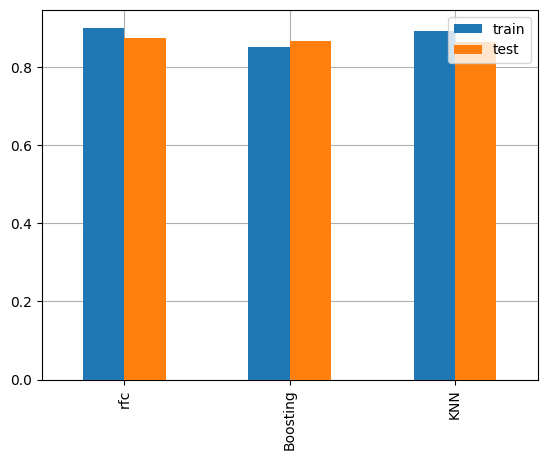

In [73]:
# Memplot Hasil Metric
fig, ax = plt.subplots()
models.sort_values(by="test", ascending=False).plot(kind='bar', ax=ax, zorder=3)
ax.grid(zorder=0)

Menguji 10 sample dengan menggunakan ketiga model tersebut

In [72]:
# Buat 10 sample prediksi dengan y_true
prediksi = X_test_scaled[0:10].copy()
pred_dict = {'y_true': y_test[0:10]}

for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(0)

pred_df = pd.DataFrame(pred_dict)
print(pred_df)


      y_true  prediksi_KNN  prediksi_rfc  prediksi_Boosting
804      0.0           0.0           0.0                0.0
743      0.0           0.0           0.0                1.0
315      0.0           0.0           0.0                0.0
1994     1.0           1.0           1.0                1.0
248      0.0           1.0           1.0                1.0
1297     0.0           0.0           0.0                0.0
2310     1.0           0.0           0.0                1.0
2478     1.0           1.0           1.0                1.0
697      0.0           0.0           0.0                0.0
1584     1.0           1.0           1.0                1.0


# Conclusion


Dalam proyek ini, penulis telah menyelesaikan serangkaian tahapan yang penting. Penulis memulai dengan memahami domain proyek dan kasus bisnis yang ingin diselesaikan. Setelah itu, penulis menyelami data yang tersedia, menyiapkan dataset, melakukan proses pemodelan, dan mengevaluasi hasilnya. Penulis berhasil menyelesaikan tantangan bisnis yang dihadapi dan mencapai tujuan dengan membangun 3 model yang berbeda. Dari ketiga model tersebut, penulis memilih model `Random Forest` sebagai solusi terbaik untuk masalah yang dihadapi.